# Energy Production

In [ ]:
#loading data
import pandas as pd
data=pd.read_csv("data.csv")

In [ ]:
#data preview
data

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [ ]:
data.shape

(9568, 5)

In [ ]:
#data types
types=data.dtypes
types

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [ ]:
#statistical summary
data.describe(include='all')

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

In [ ]:
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [ ]:
data.duplicated().sum()

41

In [ ]:
df=data.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'exhaust_vacuum'}>],
       [<Axes: title={'center': 'amb_pressure'}>,
        <Axes: title={'center': 'r_humidity'}>],
       [<Axes: title={'center': 'energy_production'}>, <Axes: >]],
      dtype=object)

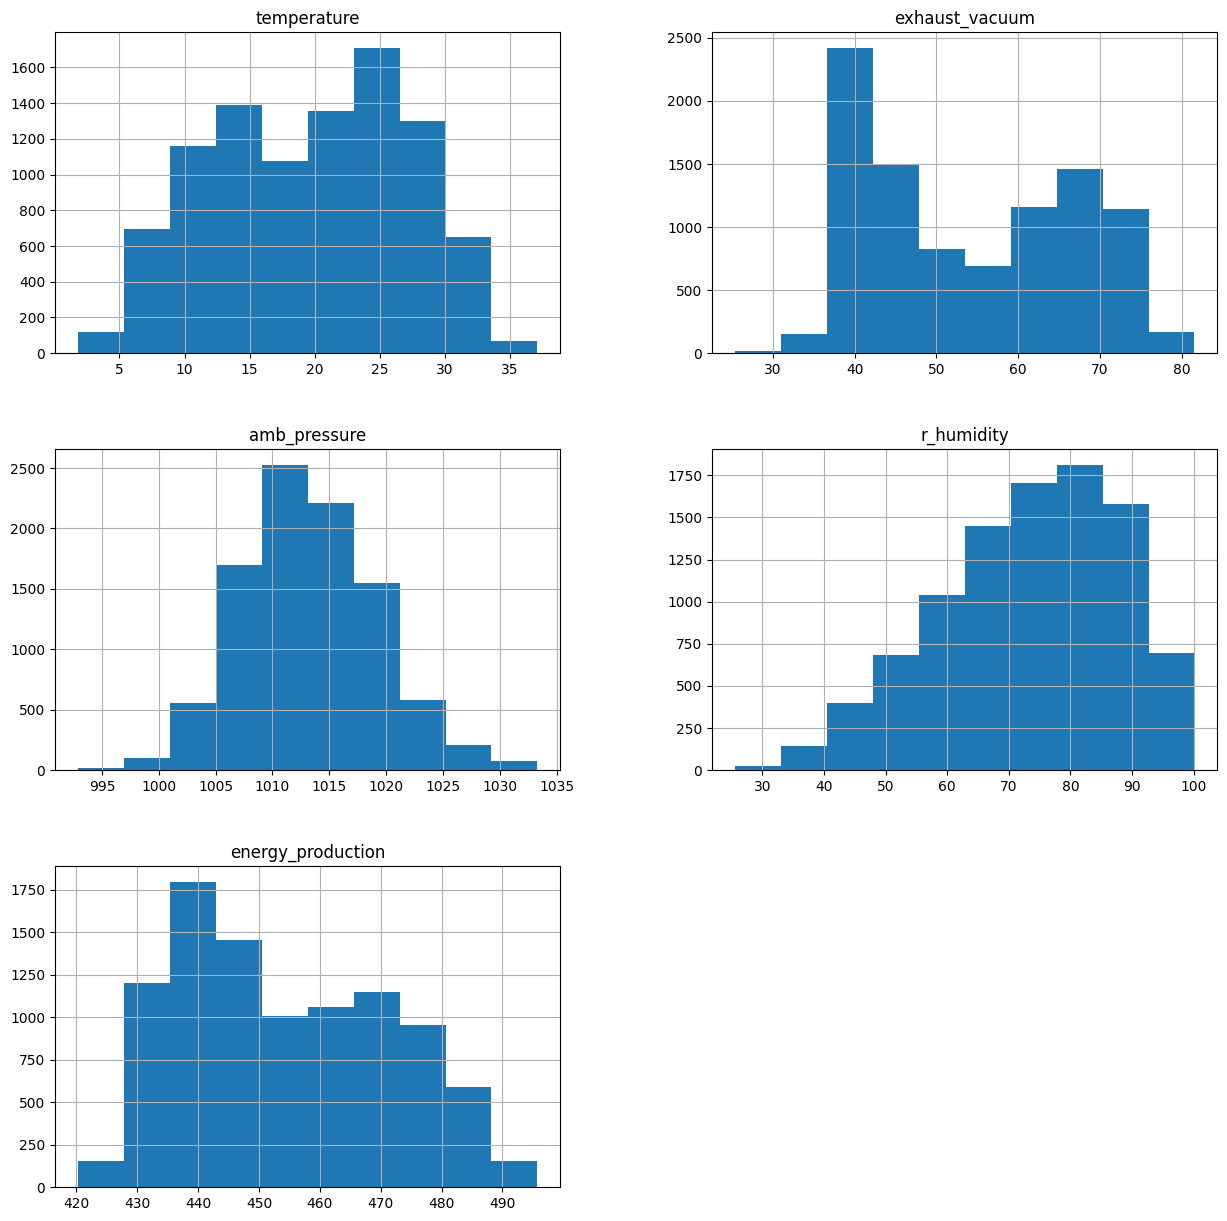

In [ ]:
#histogram
df.hist(figsize=(15,15))

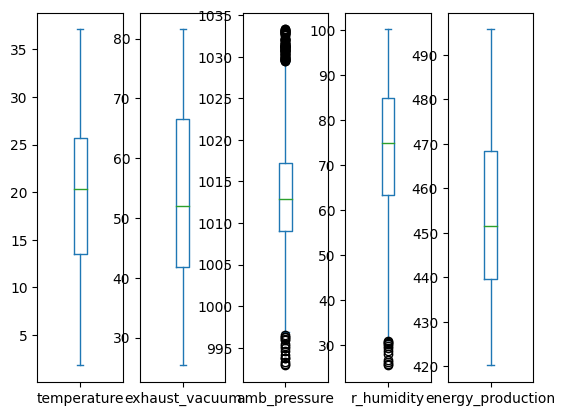

In [ ]:
# Box and Whisker Plots
import matplotlib.pyplot as plot
data.plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False)
plot.show()

Outliers in amb_pressure and r_humidity

In [ ]:
#correlation matrix
df.corr()

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843689     -0.508222   -0.543947   
exhaust_vacuum        0.843689        1.000000     -0.415718   -0.312214   
amb_pressure         -0.508222       -0.415718      1.000000    0.101631   
r_humidity           -0.543947       -0.312214      0.101631    1.000000   
energy_production    -0.947908       -0.869900      0.518687    0.391175   

                   energy_production  
temperature                -0.947908  
exhaust_vacuum             -0.869900  
amb_pressure                0.518687  
r_humidity                  0.391175  
energy_production           1.000000

<Axes: >

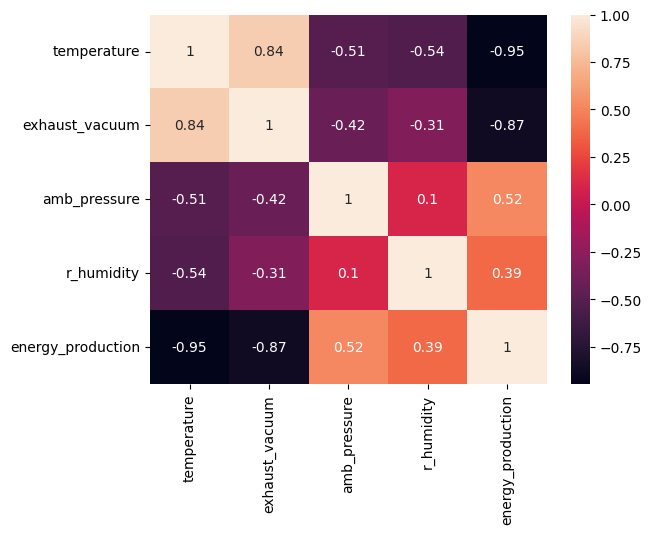

In [ ]:
#heatmap plot for correlation matrix
import seaborn as sns
sns.heatmap(df.corr(),annot=True)


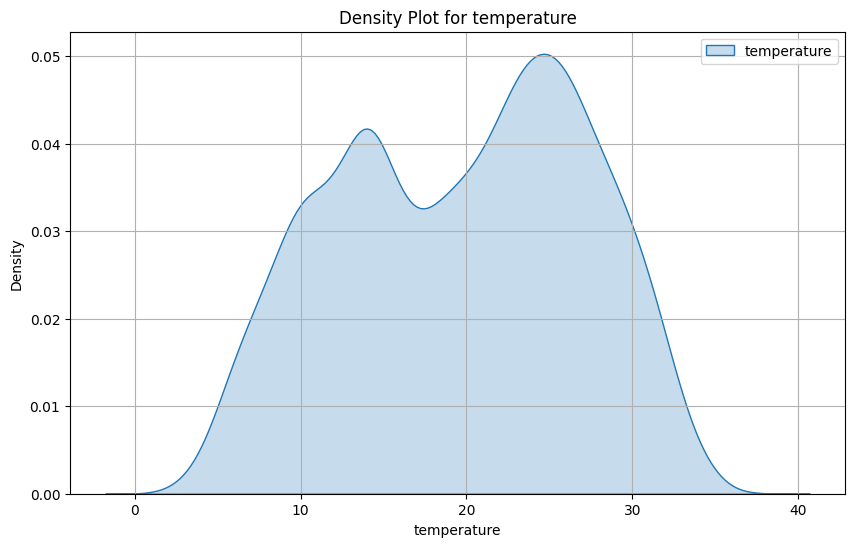

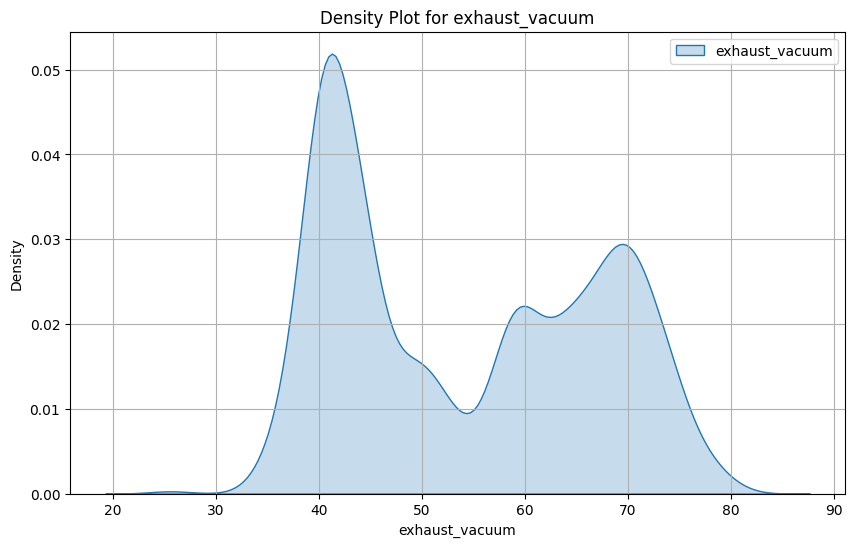

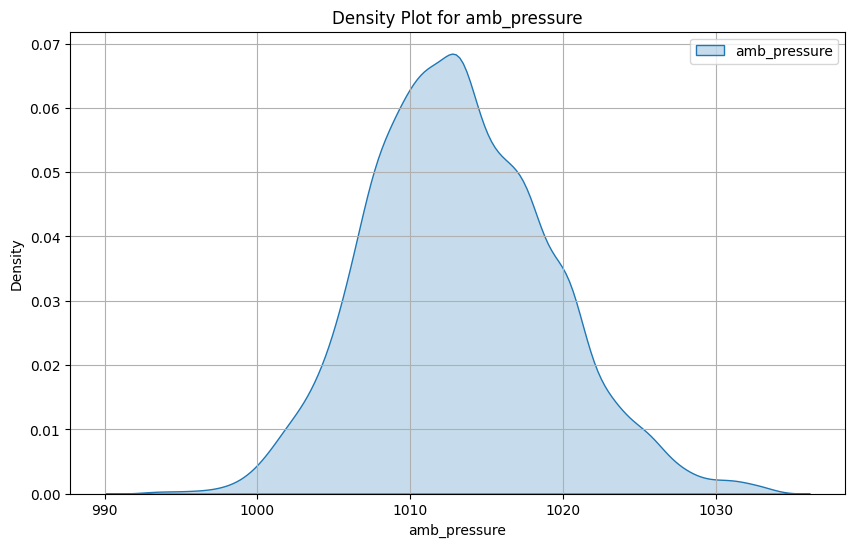

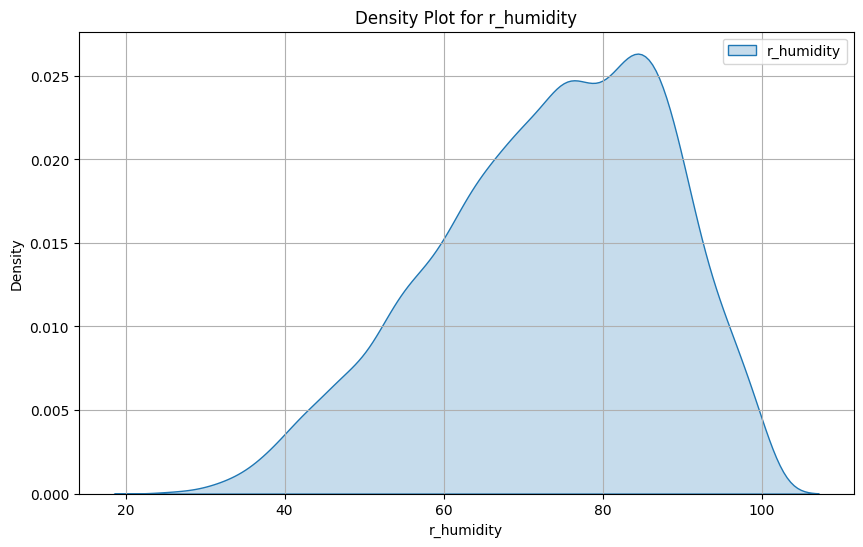

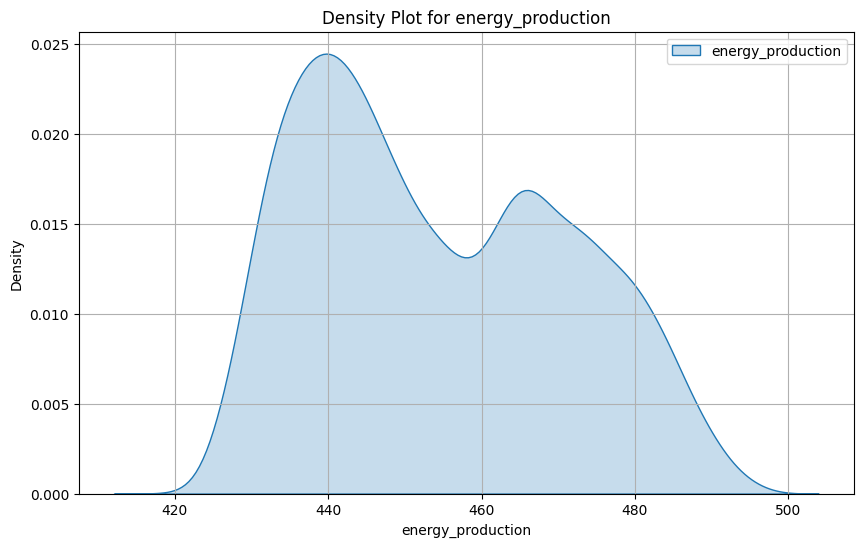

In [ ]:
#univariate density plot

import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(10, 6))  # Set a new figure for each variable

    # Check if the column data type is float or int
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.kdeplot(df[col], label=col, fill=True)  # Create density plot with filling
        plt.xlabel(col)  # Set x-axis label
        plt.ylabel('Density')  # Set y-axis label
        plt.title(f'Density Plot for {col}')  # Set title
        plt.legend()  # Show legend
        plt.grid(True)  # Enable grid
        plt.show()  # Show plot for each variable

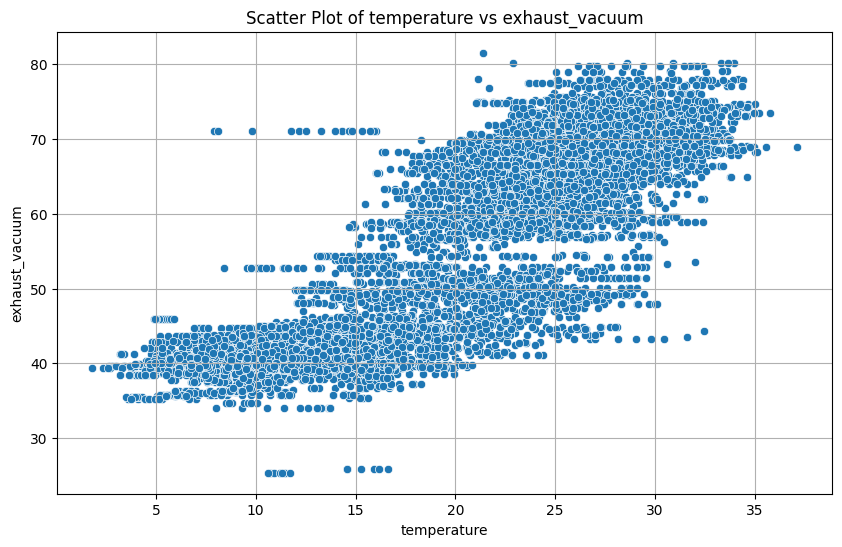

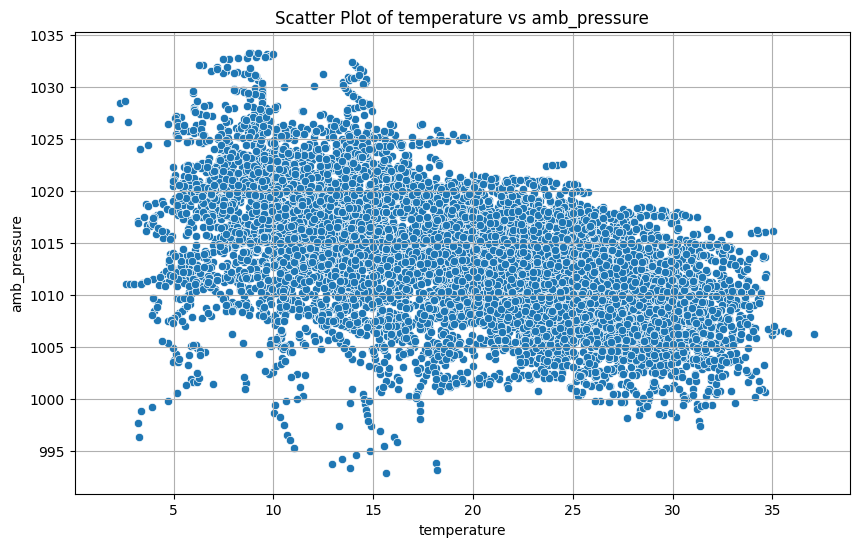

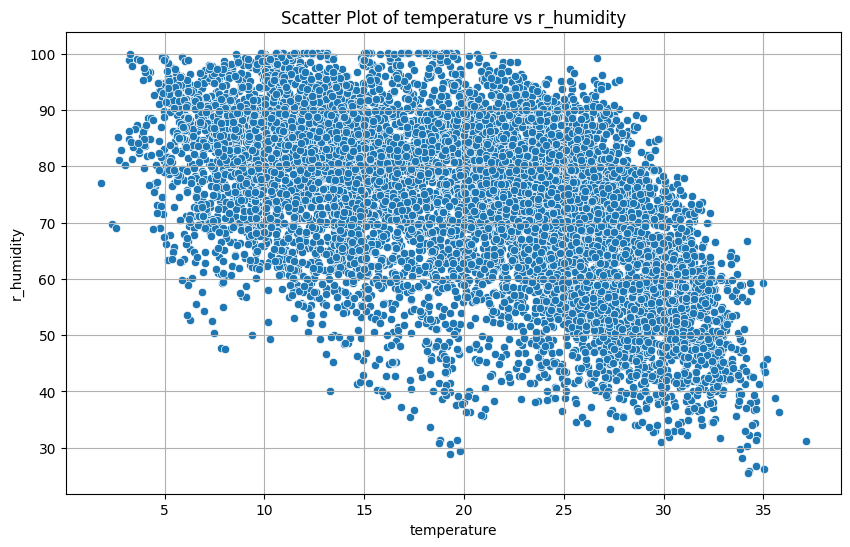

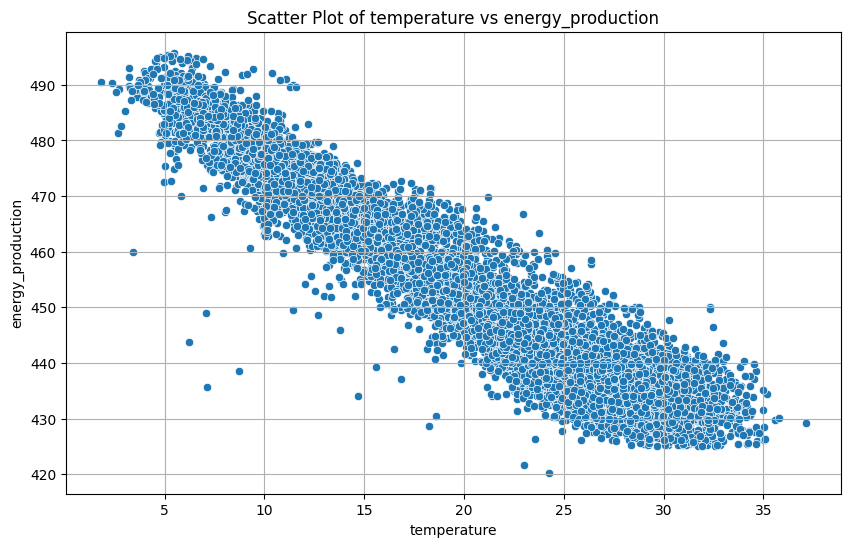

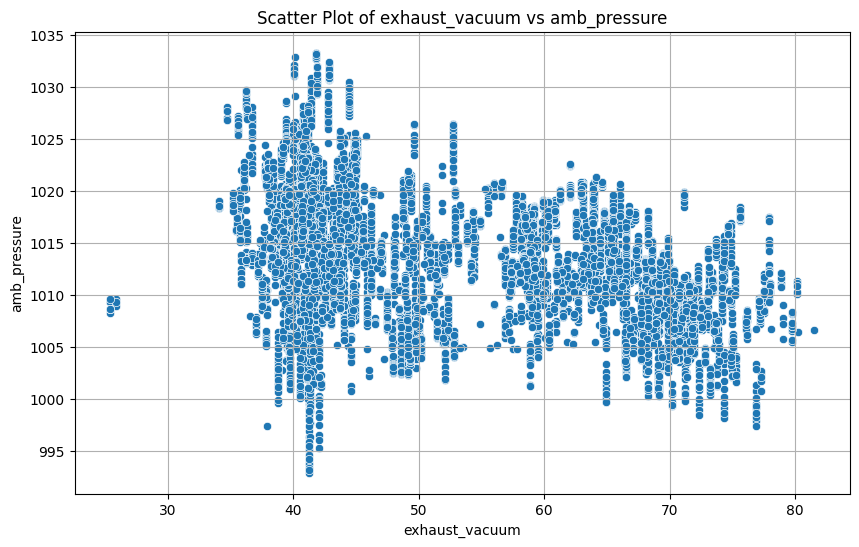

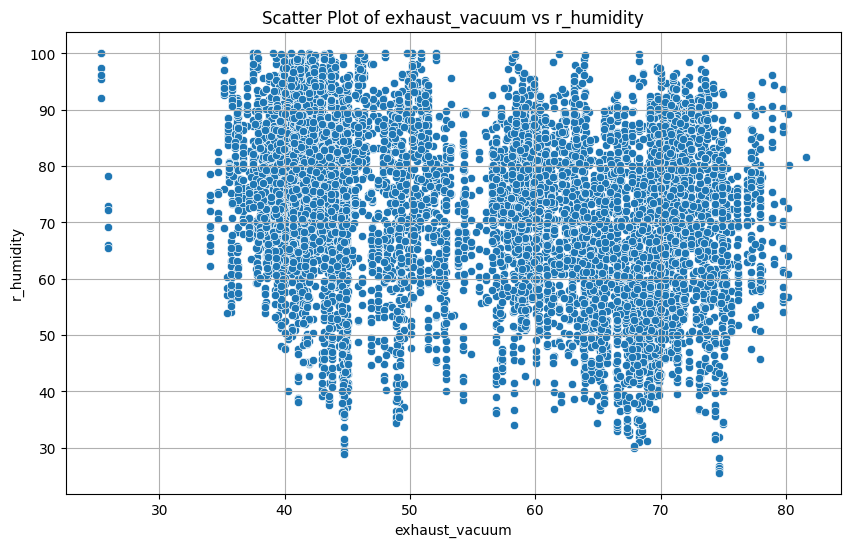

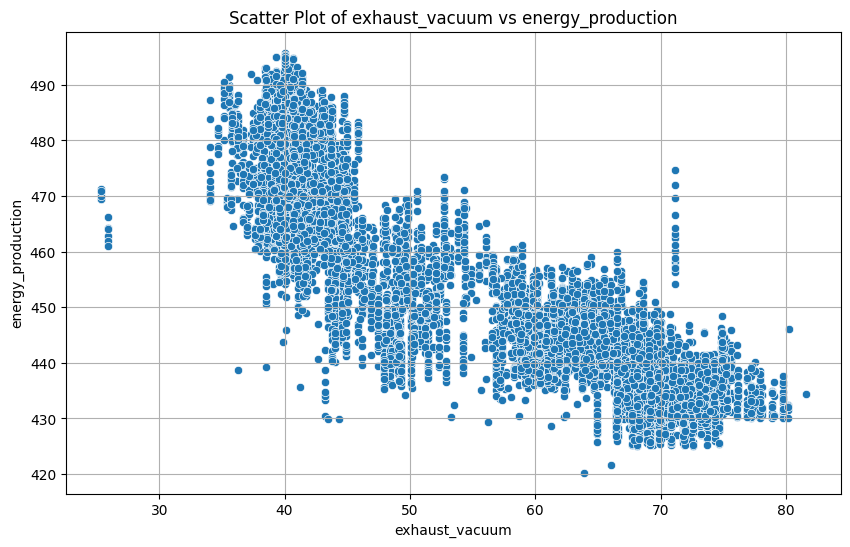

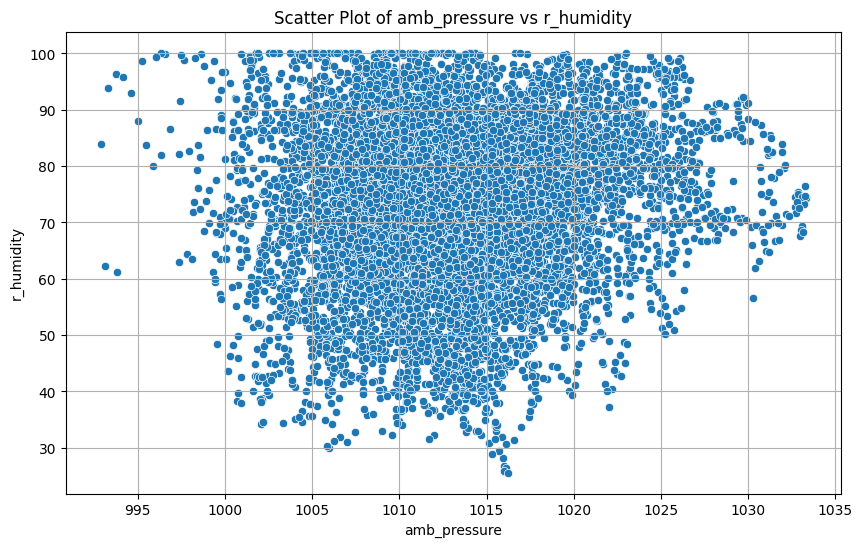

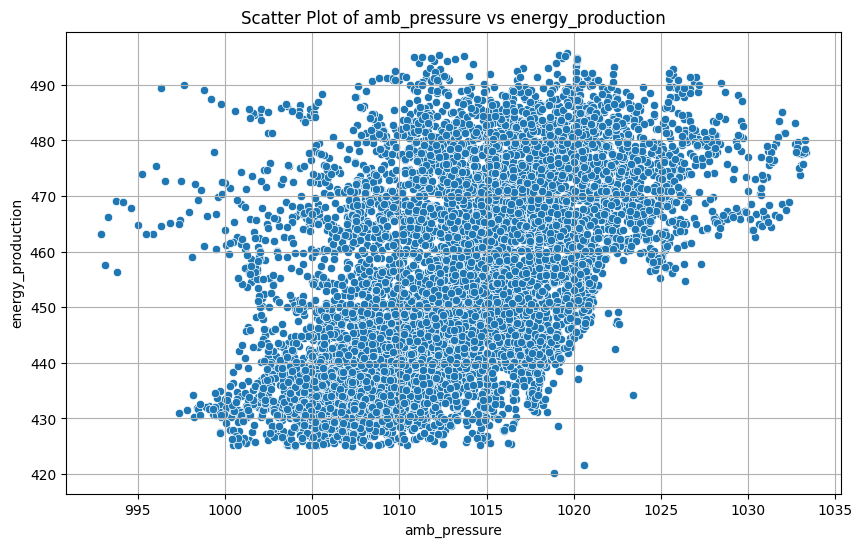

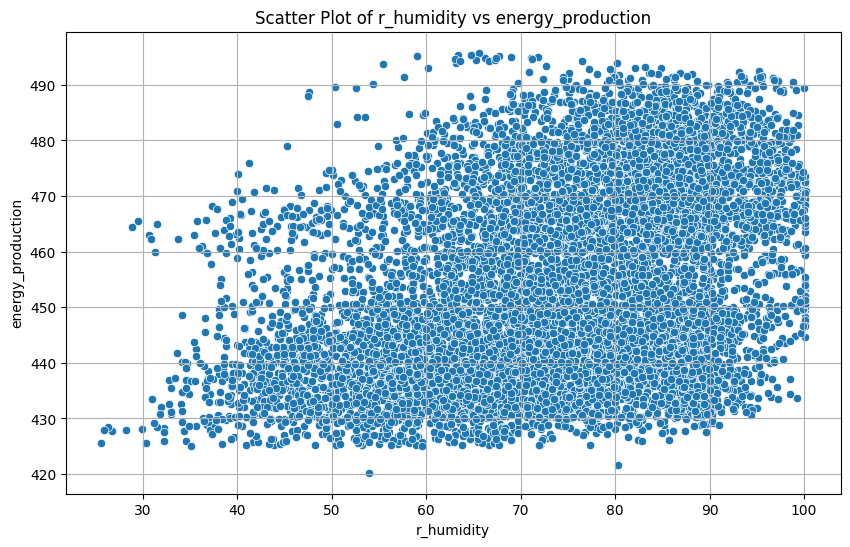

In [ ]:
from itertools import combinations

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Generate scatter plots for each pair of numeric columns
for col1, col2 in combinations(numeric_cols, 2):
    plt.figure(figsize=(10, 6))  # Set a new figure for each pair
    sns.scatterplot(data=df, x=col1, y=col2)  # Create scatter plot
    plt.xlabel(col1)  # Set x-axis label
    plt.ylabel(col2)  # Set y-axis label
    plt.title(f'Scatter Plot of {col1} vs {col2}')  # Set title
    plt.grid(True)  # Enable grid
    plt.show()  # Show plot for each pair

# **DATA PREPROCESSING**

In [ ]:
def calculate_outlier_percentage(column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]

    # Calculate percentage
    percentage_outliers = (len(outliers) / len(column)) * 100
    return percentage_outliers

# Calculate percentage of outliers for each column
for col in df.columns:
    outlier_percentage = calculate_outlier_percentage(df[col])
    print(f"Percentage of outliers in {col}: {outlier_percentage:.2f}%")

Percentage of outliers in temperature: 0.00%
Percentage of outliers in exhaust_vacuum: 0.00%
Percentage of outliers in amb_pressure: 0.96%
Percentage of outliers in r_humidity: 0.14%
Percentage of outliers in energy_production: 0.00%


In [ ]:
# Outlier Handling: Z-Score Method
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(df))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Alternatively, use the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_no_outliers_iqr.shape

(9423, 5)

In [ ]:
df_no_outliers.shape

(9469, 5)

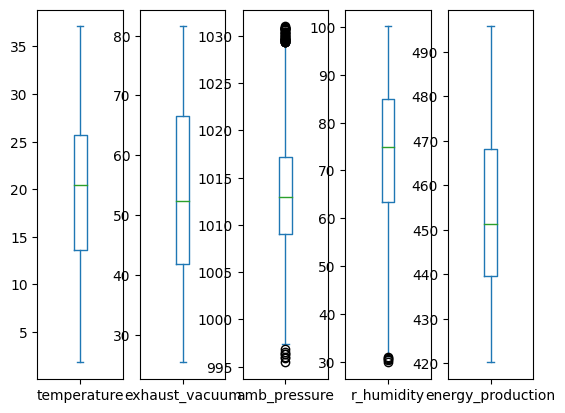

In [ ]:
df_no_outliers.plot(kind='box',subplots=True,layout=(1,5),sharex=False,sharey=False)
plt.show()

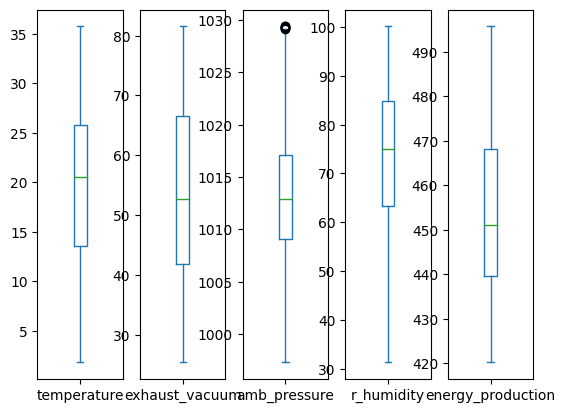

In [ ]:
df_no_outliers_iqr.plot(kind='box',subplots=True,layout=(1,5),sharex=False,sharey=False)
plt.show()

In [ ]:
#removing outliers again using iqr

In [ ]:
Q1 = df_no_outliers_iqr.quantile(0.25)
Q3 = df_no_outliers_iqr.quantile(0.75)
IQR = Q3 - Q1

df_new = df_no_outliers_iqr[~((df_no_outliers_iqr < (Q1 - 1.5 * IQR)) | (df_no_outliers_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]

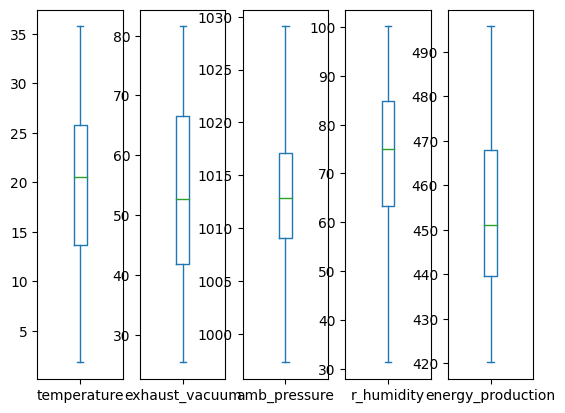

In [ ]:
df_new.plot(kind='box',subplots=True,layout=(1,5),sharex=False,sharey=False)
plt.show()

In [ ]:
#Re-scaling data using standardscaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df=pd.DataFrame(df_scaled,columns=df.columns)

# Model Building with outliers

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df1=pd.DataFrame(df_scaled,columns=df.columns)

In [ ]:
X=df1.drop('energy_production',axis=1)
y=df1['energy_production']

In [ ]:
#splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7621, 4), (1906, 4), (7621,), (1906,))

# Linear Regression

In [ ]:
#Linear Regression

LR=LinearRegression()
LR.fit(X_train,y_train)
pred1=LR.predict(X_test)
accuracy_linear=r2_score(y_test,pred1)
mse_linear=mean_squared_error(y_test,pred1)
print(f"Accuracy: {accuracy_linear}")
print(f"Mean Squared Error: {mse_linear}")

Accuracy: 0.9283024922947182
Mean Squared Error: 0.07191958039203342


# Lasso Regularization

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
#lasso regularization

lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
pred_lasso=lasso.predict(X_test)
accuracy_lasso=r2_score(y_test,pred_lasso)
mse_lasso=mean_squared_error(y_test,pred_lasso)
print(f"Accuracy: {accuracy_lasso}")
print(f"Mean Squared Error: {mse_lasso}")

Accuracy: 0.9035155379018975
Mean Squared Error: 0.09678330880022187


Applying Grid Search CV to find best alpha value

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#finding best aplha value
param_grid={'alpha':[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]}
grid_search=GridSearchCV(lasso,param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_alpha=grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

Best Alpha: 0.001


In [ ]:
#fitting lasso regularization using best alpha value
lasso_best=Lasso(alpha=best_alpha)
lasso_best.fit(X_train,y_train)
pred_lasso_best=lasso_best.predict(X_test)
accuracy_lasso_best=r2_score(y_test,pred_lasso_best)
mse_lasso_best=mean_squared_error(y_test,pred_lasso_best)
print(f"Accuracy: {accuracy_lasso_best}")
print(f"Mean Squared Error: {mse_lasso_best}")

Accuracy: 0.9282814629055898
Mean Squared Error: 0.07194067491666083


# Ridge regularization

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
#ridge regularization

ridge=Ridge(alpha=1)
ridge.fit(X_train,y_train)
pred_ridge=ridge.predict(X_test)
accuracy_ridge=r2_score(y_test,pred_ridge)
mse_ridge=mean_squared_error(y_test,pred_ridge)
print(f"Accuracy: {accuracy_ridge}")
print(f"Mean Squared Error: {mse_ridge}")

Accuracy: 0.9283028519264528
Mean Squared Error: 0.07191921964639136


In [ ]:
grid_search=GridSearchCV(ridge,param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_alpha=grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

Best Alpha: 0.001


In [ ]:
ridge_best=Ridge(alpha=best_alpha)
ridge_best.fit(X_train,y_train)
pred_ridge_best=ridge_best.predict(X_test)
accuracy_ridge_best=r2_score(y_test,pred_ridge_best)
mse_ridge_best=mean_squared_error(y_test,pred_ridge_best)
print(f"Accuracy: {accuracy_ridge_best}")
print(f"Mean Squared Error: {mse_ridge_best}")

Accuracy: 0.9283024927153237
Mean Squared Error: 0.07191957997012514


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#decision tree

DT=DecisionTreeRegressor(random_state=42)
DT.fit(X_train,y_train)
pred2=DT.predict(X_test)
accuracy_DT=r2_score(y_test,pred2)
mse_DT=mean_squared_error(y_test,pred2)
print(f"Accuracy: {accuracy_DT}")
print(f"Mean Squared Error: {mse_DT}")

Accuracy: 0.9329708723649648
Mean Squared Error: 0.06723674068799812


In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the model
model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE: 0.05640988054782513


In [ ]:
#decision tree using best parameters

DT_best=DecisionTreeRegressor(max_depth=10,max_features=None,min_samples_leaf=4,min_samples_split=10,random_state=42)
DT_best.fit(X_train,y_train)
pred2_best=DT_best.predict(X_test)
accuracy_DT_best=r2_score(y_test,pred2_best)
mse_DT_best=mean_squared_error(y_test,pred2_best)
print(f"Accuracy: {accuracy_DT_best}")
print(f"Mean Squared Error: {mse_DT_best}")

Accuracy: 0.944770554664066
Mean Squared Error: 0.055400510575244234


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#random forest

RFR=RandomForestRegressor(random_state=42)
RFR.fit(X_train,y_train)
pred3=RFR.predict(X_test)
accuracy_RFR=r2_score(y_test,pred3)
mse_RFR=mean_squared_error(y_test,pred3)
print(f"Accuracy: {accuracy_RFR}")
print(f"Mean Squared Error: {mse_RFR}")

Accuracy: 0.9617522904131034
Mean Squared Error: 0.03836617634957643


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150,200,250,300],
    'max_depth': [10, 20,30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2','auto']
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Try 10 different combinations of parameters
    cv=3,  # Cross-validation folds
    n_jobs=-1,  # Use all cores
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best Parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


In [ ]:
RFR_best=RandomForestRegressor(n_estimators = 250, min_samples_split=2, min_samples_leaf= 1, max_features='log2', max_depth=20)

In [ ]:
RFR_best.fit(X_train,y_train)
y_pred3_best=RFR_best.predict(X_test)
accuracy_RFR_best=r2_score(y_test,y_pred3_best)
mse_RFR_best=mean_squared_error(y_test,y_pred3_best)
print(f"Accuracy: {accuracy_RFR_best}")
print(f"Mean Squared Error: {mse_RFR_best}")

Accuracy: 0.9635494141021345
Mean Squared Error: 0.03656348632917876


# Support Vector Machine

In [ ]:
from sklearn.svm import SVR

In [ ]:
#support vector machine

svr=SVR()
svr.fit(X_train,y_train)
pred3=RFR.predict(X_test)
accuracy_SVM=r2_score(y_test,pred3)
mse_SVM=mean_squared_error(y_test,pred3)
print(f"Accuracy: {accuracy_SVM}")
print(f"Mean Squared Error: {mse_SVM}")

Accuracy: 0.9617522904131034
Mean Squared Error: 0.03836617634957643


In [ ]:
# Define parameter distribution
param_dist = {
    'C': [0.01,0.1, 1, 10],
    'gamma': ['scale','auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.01, 0.1, 0.2]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=SVR(), param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 0.1}


In [ ]:
SVR_best=SVR(kernel='rbf',gamma='scale',C=0.1,epsilon=0.1)
SVR_best.fit(X_train,y_train)
pred4_best=SVR_best.predict(X_test)
accuracy_SVR_best=r2_score(y_test,pred4_best)
mse_SVR_best=mean_squared_error(y_test,pred4_best)
print(f"Accuracy: {accuracy_SVR_best}")
print(f"Mean Squared Error: {mse_SVR_best}")

Accuracy: 0.9388244912675604
Mean Squared Error: 0.06035569710289261


# K-Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#knn

knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
pred5=knn.predict(X_test)
accuracy_KNN=r2_score(y_test,pred5)
mse_KNN=mean_squared_error(y_test,pred5)
print(f"Accuracy: {accuracy_KNN}")
print(f"Mean Squared Error: {mse_KNN}")

Accuracy: 0.9494020274450304
Mean Squared Error: 0.05075469247549527


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],  # Uniform: all neighbors contribute equally, Distance: closer neighbors contribute more
    'p': [1, 2]  # p=1 (Manhattan), p=2 (Euclidean)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
#building knn model with best parameters

knn_best=KNeighborsRegressor(n_neighbors=7,p=1,weights='distance')
knn_best.fit(X_train,y_train)
y_pred5_best=knn_best.predict(X_test)
accuracy_KNN_best=r2_score(y_test,y_pred5_best)
mse_KNN_best=mean_squared_error(y_test,y_pred5_best)
print(f"Accuracy: {accuracy_KNN_best}")
print(f"Mean Squared Error: {mse_KNN_best}")

Accuracy: 0.9558810990517674
Mean Squared Error: 0.04425555287915292


# XG Boost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#xgboost

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
pred6=xgb.predict(X_test)
accuracy_XGBR=r2_score(y_test,pred6)
mse_XGBR=mean_squared_error(y_test,pred6)
print(f"Accuracy: {accuracy_XGBR}")
print(f"Mean Squared Error: {mse_XGBR}")

Accuracy: 0.964741636097809
Mean Squared Error: 0.035367571597867166


In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the XGBoost model for regression
model = XGBRegressor()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Best estimator
best_model = grid_search.best_estimator_

# Make predictions
y_pred_best = best_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)  # Root Mean Squared Error
print(f"Best Model RMSE: {rmse_best:.2f}")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Model RMSE: 0.19


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
xgb_best=XGBRegressor(colsample_bytree=1.0,learning_rate=0.2,max_depth=5,n_estimators=200,subsample=1.0)
xgb_best.fit(X_train,y_train)
y_pred6_best=xgb_best.predict(X_test)
accuracy_XGBR_best=r2_score(y_test,y_pred6_best)
mse_XGBR_best=mean_squared_error(y_test,y_pred6_best)
print(f"Accuracy: {accuracy_XGBR_best}")
print(f"Mean Squared Error: {mse_XGBR_best}")

Accuracy: 0.9638349524793024
Mean Squared Error: 0.036277063538080426


# Light Gbm Regression

In [ ]:
from lightgbm import LGBMRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#light gbm

lgb=LGBMRegressor()
lgb.fit(X_train,y_train)
pred7=lgb.predict(X_test)
accuracy_LGB=r2_score(y_test,pred7)
mse_LGB=mean_squared_error(y_test,pred7)
print(f"Accuracy: {accuracy_LGB}")
print(f"Mean Squared Error: {mse_LGB}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7621, number of used features: 4
[LightGBM] [Info] Start training from score -0.004257
Accuracy: 0.9596123155219513
Mean Squared Error: 0.04051277950423266


In [ ]:
# Define the parameter grid
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the LightGBM model for regression
model = LGBMRegressor()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7621, number of used features: 4
[LightGBM] [Info] Start training from score -0.004257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
lgb_best=LGBMRegressor(colsample_bytree=1.0,learning_rate=0.2,max_depth=5,n_estimators=200,num_leaves=20,subsample=0.6)
lgb_best.fit(X_train,y_train)
y_pred7_best=lgb_best.predict(X_test)
accuracy_LGB_best=r2_score(y_test,y_pred7_best)
mse_LGB_best=mean_squared_error(y_test,y_pred7_best)
print(f"Accuracy: {accuracy_LGB_best}")
print(f"Mean Squared Error: {mse_LGB_best}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 7622, number of used features: 4
[LightGBM] [Info] Start training from score 0.006270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
#k fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}

# Define number of folds for cross-validation
n_splits = 5  # You can adjust this value

# Perform cross-validation for each model
for model_name, model in models.items():
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    accuracies = []  # Initialize accuracies list here

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metric (e.g., MSE)
        mse = mean_squared_error(y_test, y_pred)
        scores.append(mse)

        #print accuracy
        accuracy=r2_score(y_test,y_pred)
        accuracies.append(accuracy)

    # Print average score across folds
    avg_score = sum(scores) / len(scores)
    print(f"{model_name}: Average MSE = {avg_score}")

    #print average accuracy across folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"{model_name}: Average Accuracy = {avg_accuracy}")

Linear Regression: Average MSE = 0.07165627865016112
Linear Regression: Average Accuracy = 0.928299332893841
Lasso: Average MSE = 0.09527900986292741
Lasso: Average Accuracy = 0.9046667480319621
Ridge: Average MSE = 0.07165627989730798
Ridge: Average Accuracy = 0.9282993330962654
Decision Tree: Average MSE = 0.06925740034779751
Decision Tree: Average Accuracy = 0.9306717530270907
Random Forest: Average MSE = 0.03828612770495525
Random Forest: Average Accuracy = 0.961673880159117
Support Vector Machine: Average MSE = 0.055621752800706345
Support Vector Machine: Average Accuracy = 0.9443501820008787
K-Nearest Neighbors: Average MSE = 0.05020393488019341
K-Nearest Neighbors: Average Accuracy = 0.9497465361978324
XGBoost: Average MSE = 0.03472886770602229
XGBoost: Average Accuracy = 0.9652353152389471
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 

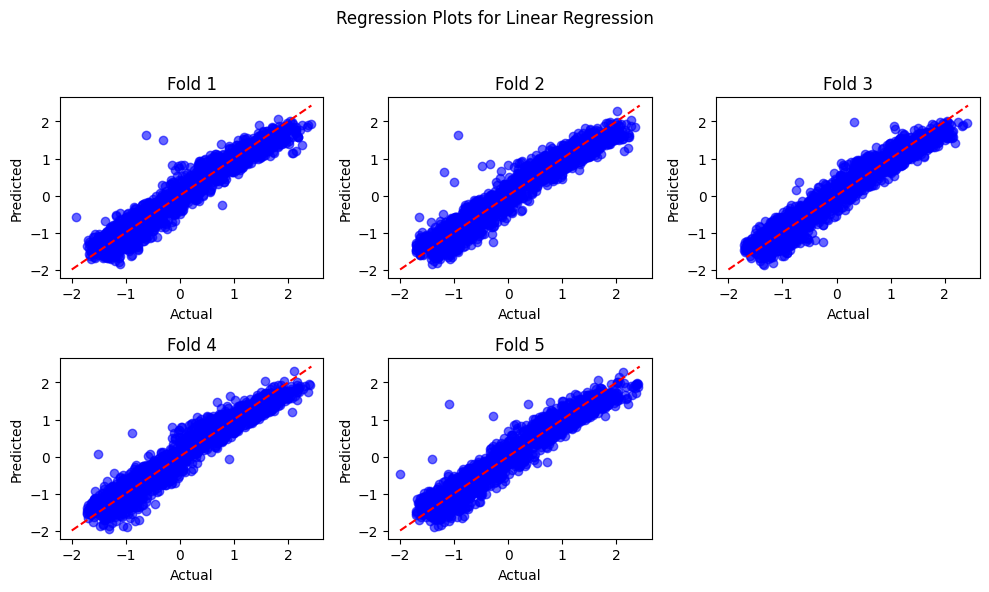

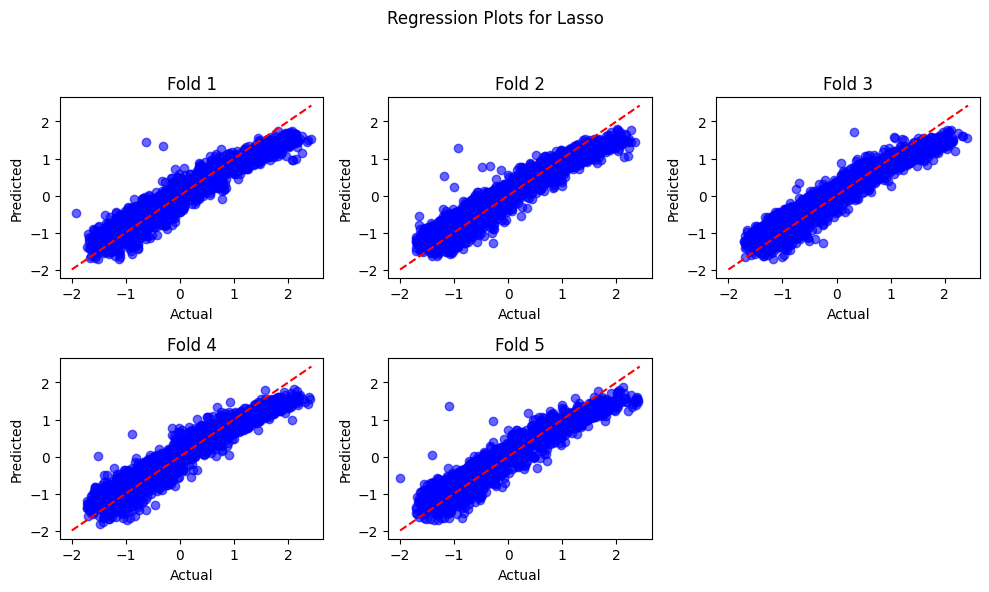

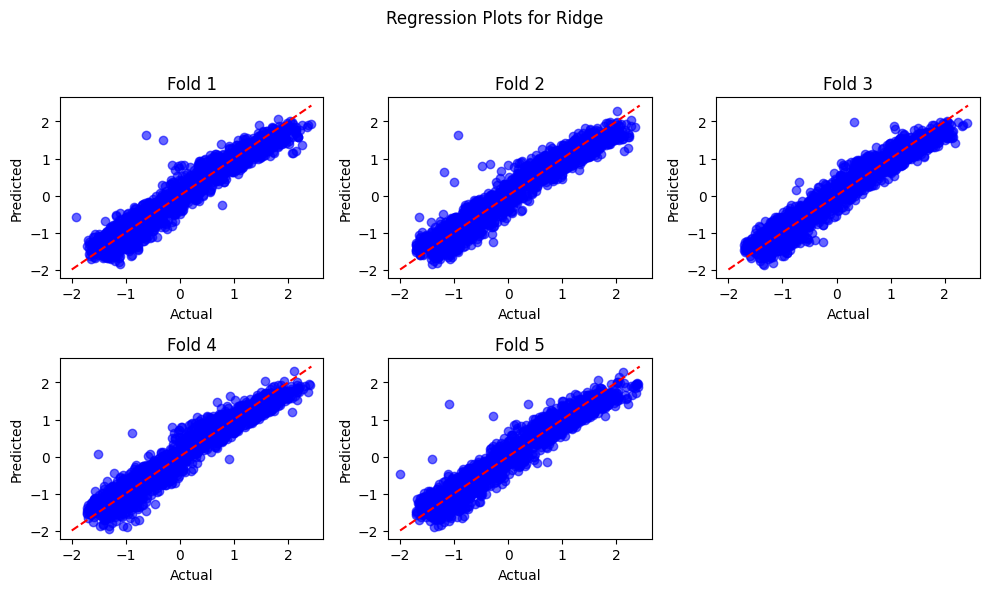

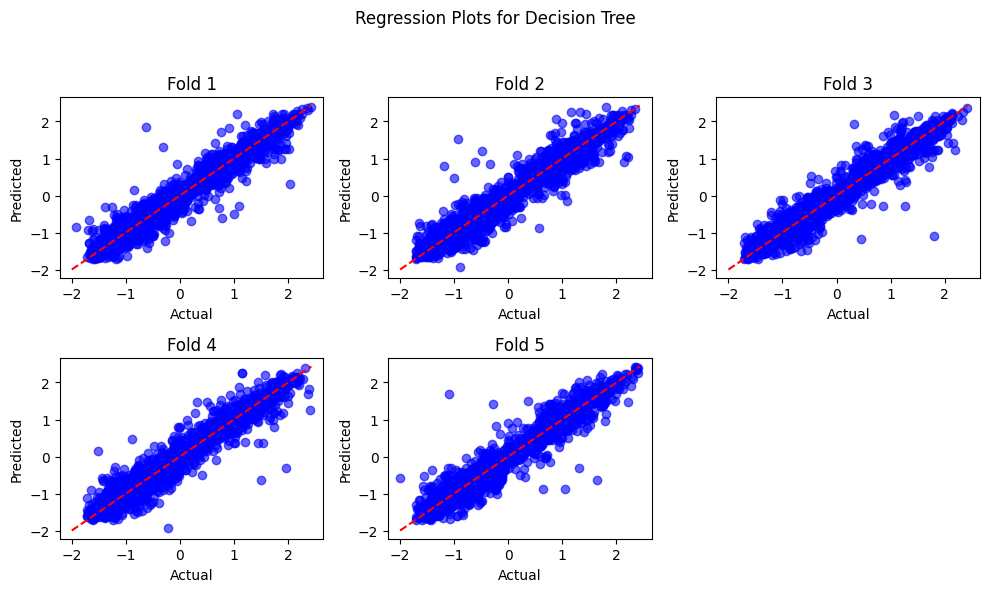

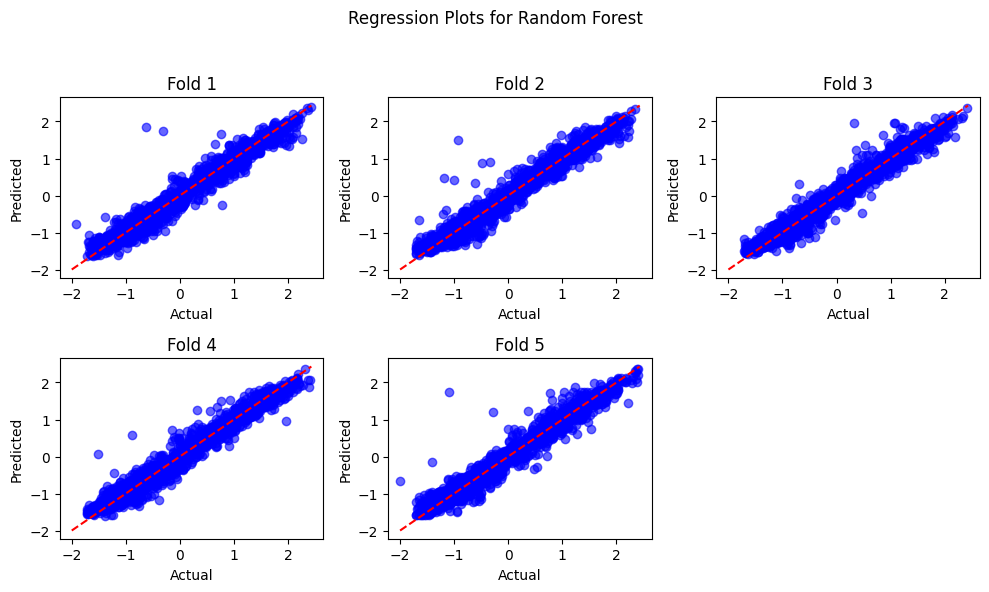

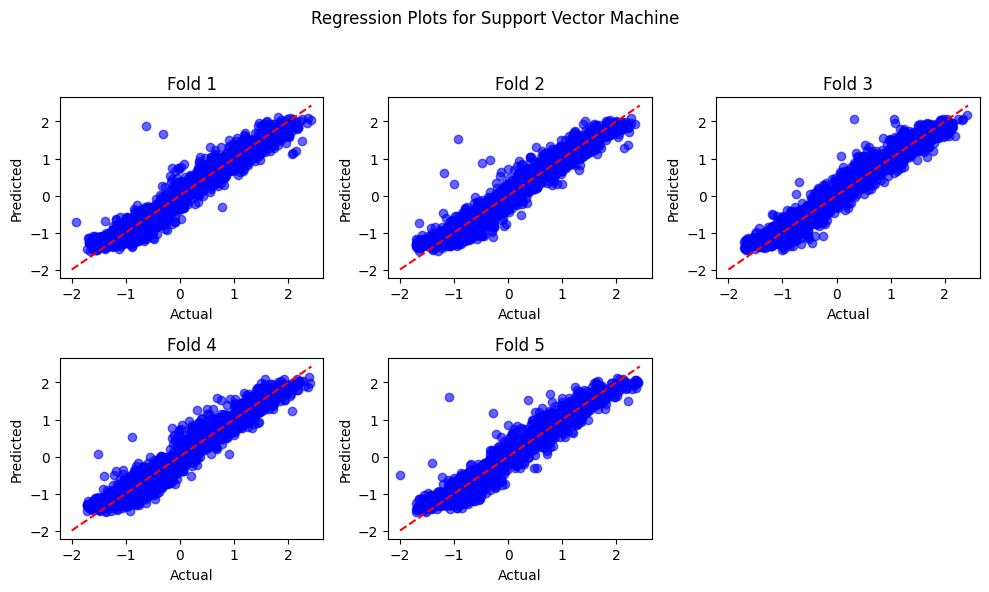

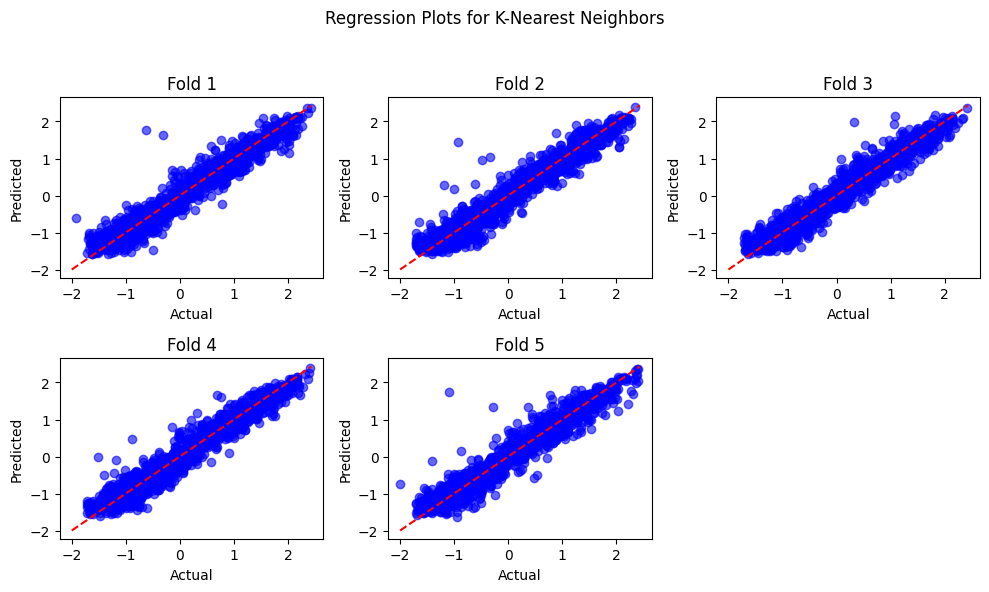

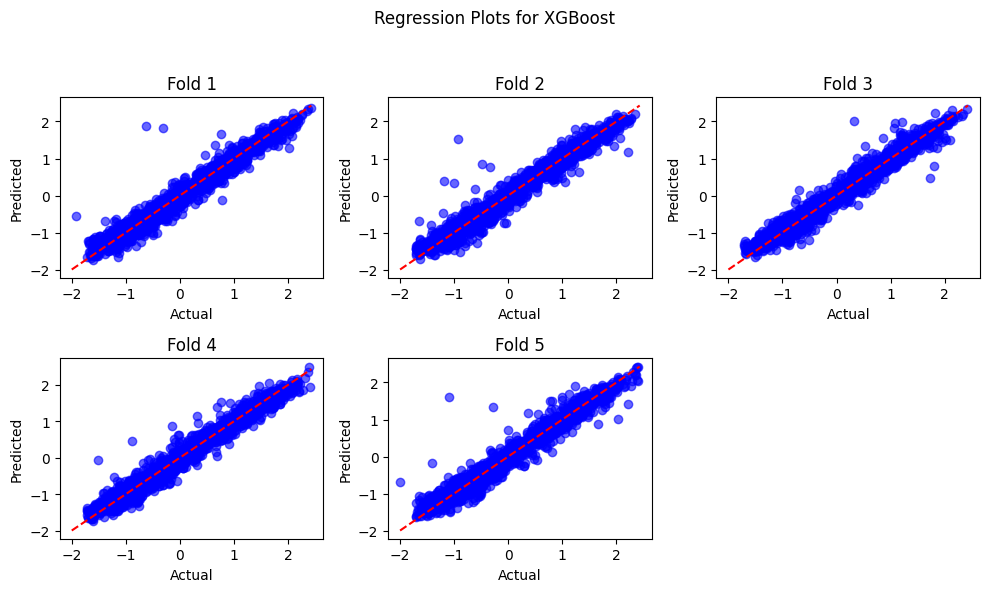

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7621, number of used features: 4
[LightGBM] [Info] Start training from score -0.004257
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7621, number of used features: 4
[LightGBM] [Info] Start training from score 0.001908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 7622, number of used features: 4
[LightGBM] [Info] Start training

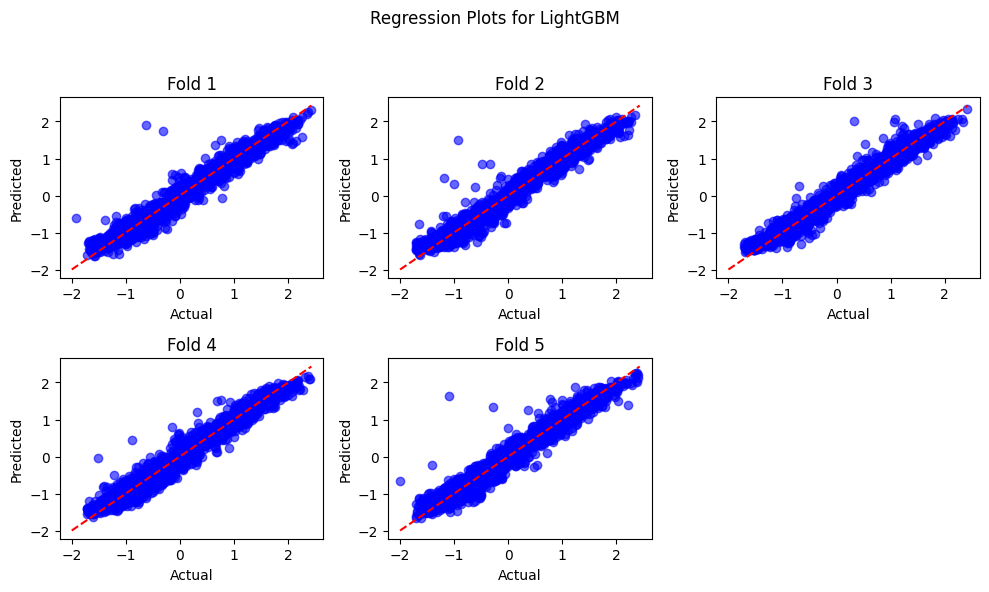

In [ ]:
for model_name, model in models.items():
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    plt.figure(figsize=(10, 6))  # Create a new figure for each model
    plt.suptitle(f"Regression Plots for {model_name}")

    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Plot the regression for this fold
        plt.subplot(2, 3, fold)  # Adjust subplot layout (2 rows, 3 columns)
        plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal fit line
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f"Fold {fold}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for title
    plt.show()  # Display the plots

# Model Building after removing Outliers

In [ ]:
df_new.shape

(9416, 5)

In [ ]:
features=df_new.drop('energy_production',axis=1)
target=df_new['energy_production']

In [ ]:
#shape of features and target

features.shape,target.shape

((9416, 4), (9416,))

In [ ]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
#shape of new training and testing set

x_train_new.shape,x_test_new.shape,y_train_new.shape,y_test_new.shape

((7532, 4), (1884, 4), (7532,), (1884,))

In [ ]:
#linear regression
LR.fit(x_train_new,y_train_new)
y_pred_linear=LR.predict(x_test_new)
accuracy_linear_new=r2_score(y_test_new,y_pred_linear)
mse_linear_new=mean_squared_error(y_test_new,y_pred_linear)
print(f"Accuracy: {accuracy_linear_new}")
print(f"Mean Squared Error: {mse_linear_new}")

Accuracy: 0.9256173755237017
Mean Squared Error: 20.609476749288408


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}

# Define number of folds for cross-validation
n_splits = 5  # You can adjust this value

# Perform cross-validation for each model
for model_name, model in models.items():
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    accuracies = []  # Initialize accuracies list here

    for train_index, test_index in kf.split(features):
        x_train_new, x_test_new = features.iloc[train_index], features.iloc[test_index]
        y_train_new, y_test_new = target.iloc[train_index], target.iloc[test_index]

        model.fit(x_train_new, y_train_new)
        y_pred_new = model.predict(x_test_new)

        # Calculate evaluation metric (e.g., MSE)
        mse = mean_squared_error(y_test_new, y_pred_new)
        scores.append(mse)

        #print accuracy
        accuracy=r2_score(y_test_new,y_pred_new)
        accuracies.append(accuracy)

    # Print average score across folds
    avg_score = sum(scores) / len(scores)
    print(f"{model_name}: Average MSE = {avg_score}")

    #print average accuracy across folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"{model_name}: Average Accuracy = {avg_accuracy}")

Linear Regression: Average MSE = 20.89787614520672
Linear Regression: Average Accuracy = 0.9275879752135022
Lasso: Average MSE = 20.898527198235392
Lasso: Average Accuracy = 0.9275857346958956
Ridge: Average MSE = 20.897876160332927
Ridge: Average Accuracy = 0.9275879753252185
Decision Tree: Average MSE = 21.04773566341712
Decision Tree: Average Accuracy = 0.9270849627928573
Random Forest: Average MSE = 11.270302808151124
Random Forest: Average Accuracy = 0.9609413797934507
Support Vector Machine: Average MSE = 180.54578210838105
Support Vector Machine: Average Accuracy = 0.3746762193933907
K-Nearest Neighbors: Average MSE = 15.916932355605695
K-Nearest Neighbors: Average Accuracy = 0.9448634583750397
XGBoost: Average MSE = 9.974553557962201
XGBoost: Average Accuracy = 0.9654547735037905
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can se